# Classification avec Kmeans de la librairie scikit-learn

In [127]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

On importe les données donclassif

In [128]:
don = pd.read_table('donclassif2.txt',header= 0,sep= ';',decimal   = '.')

In [129]:
don.head()

,V1,V2
0,5.971089,-0.027773
1,6.035601,0.037879
2,5.968887,-0.027694
3,5.953036,-0.042402
4,6.034341,0.040049


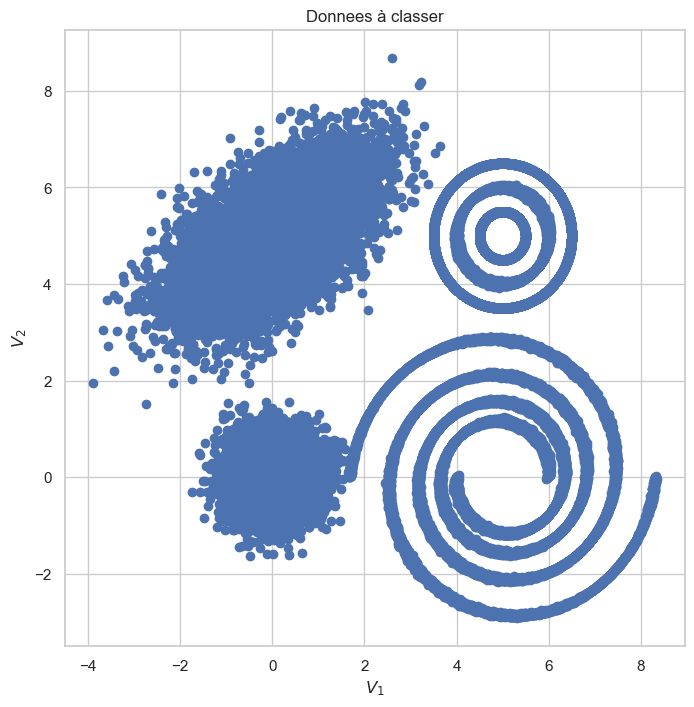

In [130]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data=don, x='V1', y='V2')
ax.set_xlabel('$V_1$')
ax.set_ylabel('$V_2$')
plt.title('Donnees à classer')
plt.show()

utilisation de Kmeans avant de choisir le k optimal

In [131]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10,random_state=42).fit(don)
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [132]:
kmeans.cluster_centers_

array([[ 4.87811735,  4.97508196],
       [ 5.12349464, -0.18395695],
       [-0.01696267,  2.24112284]])

In [133]:
kmeans.inertia_

252697.41036362416

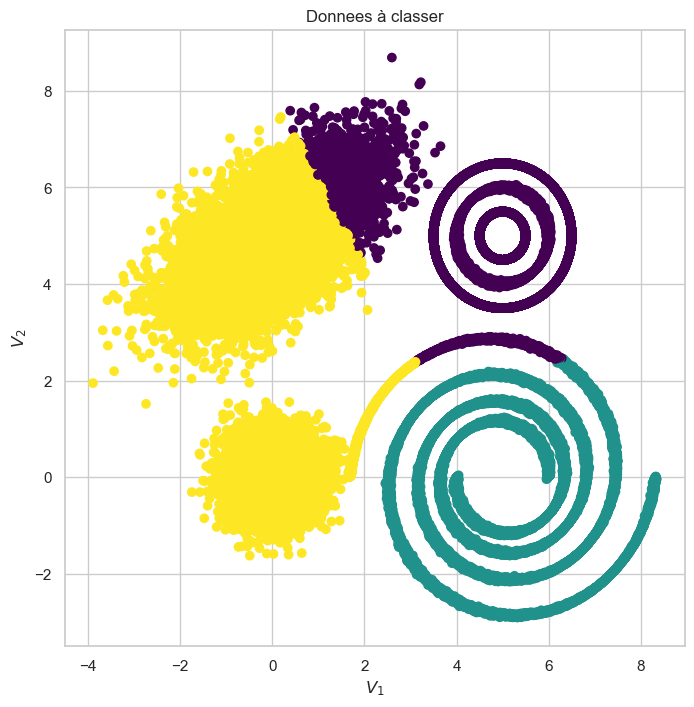

In [134]:
don["groupe"] = kmeans.labels_
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(don["V1"], don["V2"],c=don["groupe"], cmap='viridis')
ax.set_xlabel('$V_1$')
ax.set_ylabel('$V_2$')
plt.title('Donnees à classer')
plt.show()

Objectif faire varier le nombre de groupes k de 1 à 20

In [54]:
don = pd.read_table('donclassif.txt',header= 0,sep= ';',decimal   = '.')

k_max = 10

inertie_intra = pd.DataFrame(columns=['k', 'inertie_intra'])

for k in range(1, k_max+1):
    print(k)
    kmeans_model = KMeans(init='random', max_iter=100, n_clusters=k, n_init=10)
    kmeans_out = kmeans_model.fit(don)
    inertie_intra.loc[k-1,'k'] = k
    inertie_intra.loc[k-1,'inertie_intra'] = kmeans_out.inertia_ * 100

inertie_intra['part_inertie_intra'] = 100 * inertie_intra['inertie_intra'] / inertie_intra['inertie_intra'][0]

1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


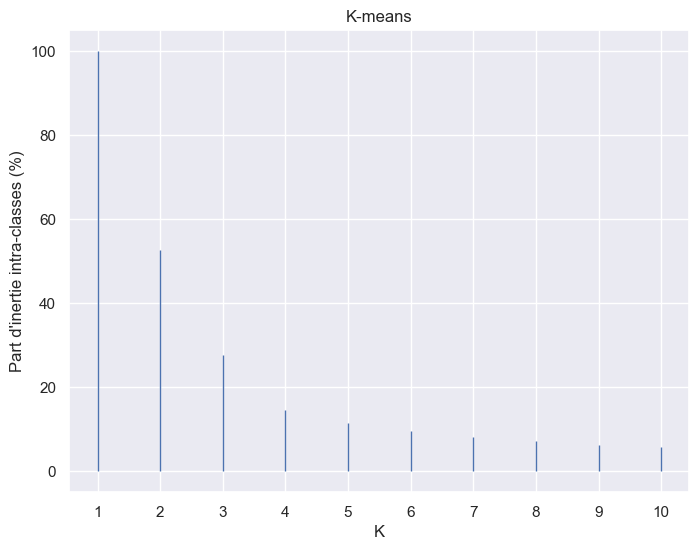

In [135]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(inertie_intra['k'], 0, inertie_intra['part_inertie_intra'], linewidth=1)
ax.set_xticks(range(1, k_max+1))
ax.set_xlabel('K')
ax.set_ylabel("Part d'inertie intra-classes (%)")
plt.title('K-means')
plt.show()

Je choisirai 4 groupes

Mais si on avait centré et réduit les données avant

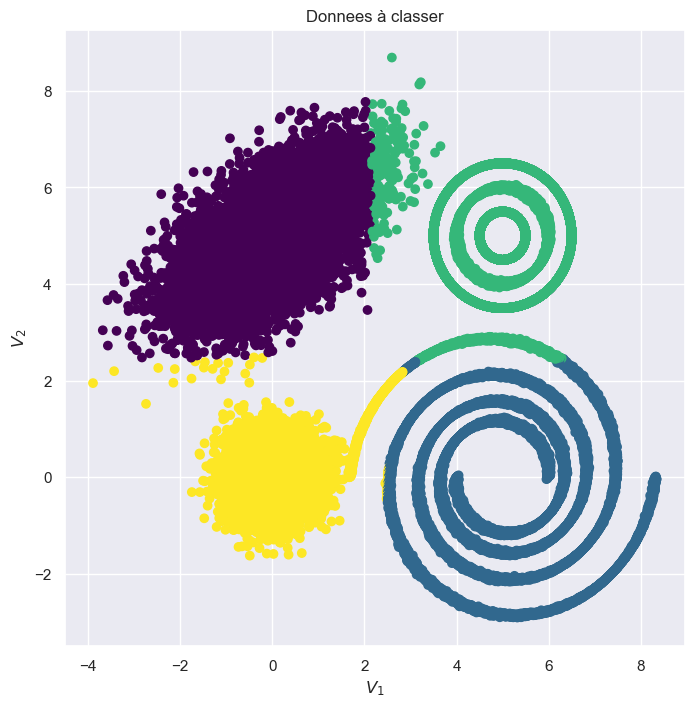

In [136]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10,random_state=42).fit(don)
don["groupe"] = kmeans.labels_
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(don["V1"], don["V2"],c=don["groupe"], cmap='viridis')
ax.set_xlabel('$V_1$')
ax.set_ylabel('$V_2$')
plt.title('Donnees à classer')
plt.show()

On tente la silhouette

In [171]:
from sklearn.metrics import silhouette_score
silhouette = pd.DataFrame(columns=['k', 'silhouette'])
k_max = 10

for k in range(2, k_max+1):
    print(k)
    kmeans_model = KMeans(init='random', max_iter=100, n_clusters=k, n_init=10)
    res = kmeans_model.fit_predict(don)
    silhouette.loc[k, 'k'] = k
    silhouette.loc[k, 'silhouette'] = silhouette_score(don, res)


2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


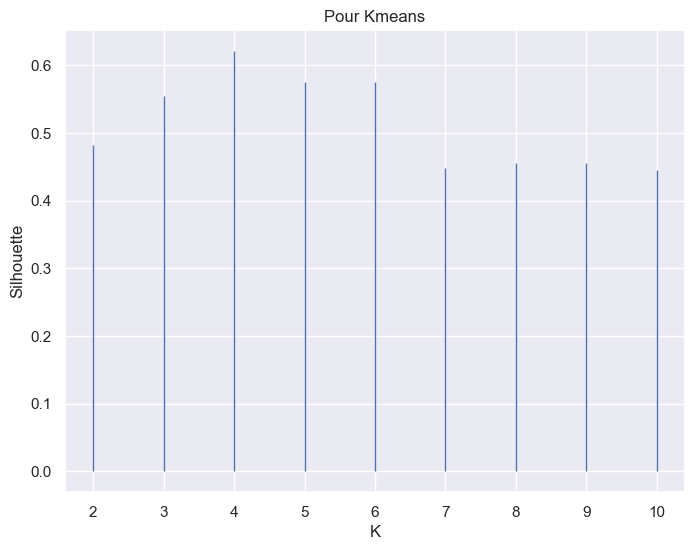

In [172]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(silhouette['k'], 0, silhouette['silhouette'], linewidth=1)
ax.set_xlabel('K')
ax.set_ylabel('Silhouette')
plt.title('Pour Kmeans')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
doncr = pd.DataFrame(scaler.fit_transform(don),columns=don.columns)

In [65]:
k_max = 10

inertie_intra_cr = pd.DataFrame(columns=['k', 'inertie_intra'])

for k in range(1, k_max+1):
    print(k)
    kmeans_model = KMeans(init='random', max_iter=100, n_clusters=k, n_init=10)
    kmeans_out = kmeans_model.fit(doncr)
    inertie_intra_cr.loc[k-1,'k'] = k
    inertie_intra_cr.loc[k-1,'inertie_intra'] = kmeans_out.inertia_ * 100

inertie_intra_cr['part_inertie_intra'] = 100 * inertie_intra_cr['inertie_intra'] / inertie_intra_cr['inertie_intra'][0]

1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


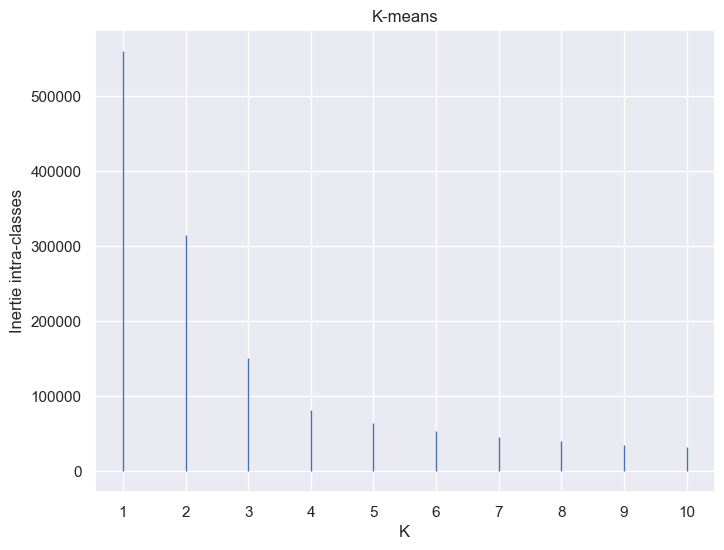

In [66]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(inertie_intra_cr['k'], 0, inertie_intra_cr['inertie_intra'], linewidth=1)
ax.set_xticks(range(1, k_max+1))
ax.set_xlabel('K')
ax.set_ylabel("Inertie intra-classes")
plt.title('K-means')
plt.show()

# CLASSIFICATION HIERARCHIQUE

# Avec la distance euclidienne et la stratégie de Ward

In [137]:
don = pd.read_table('donclassif2.txt',header= 0,sep= ';',decimal   = '.')
from sklearn.cluster import AgglomerativeClustering
cah_model = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(don)

On représente le dendrogramme :

In [94]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

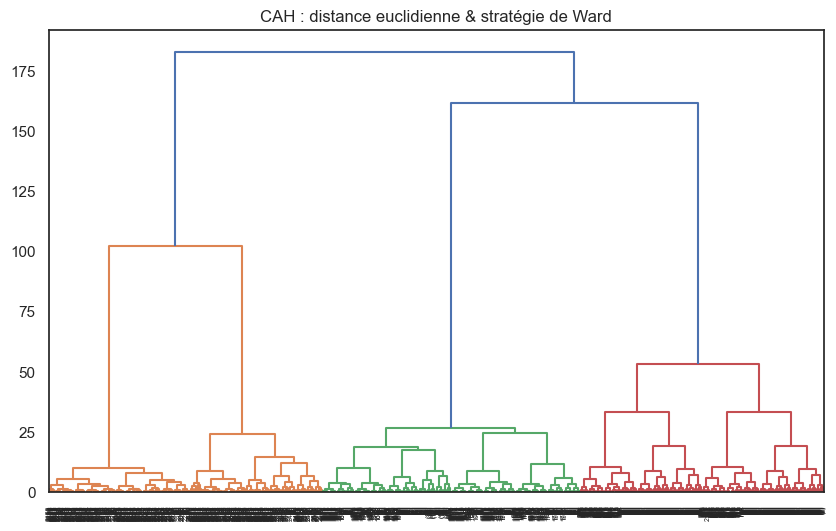

In [95]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('CAH : distance euclidienne & stratégie de Ward')
plot_dendrogram(cah_out, truncate_mode='level', p=10)
plt.show()

Le dendrogramme n'est pas lisible lorsqu'il y a trop d'individus. On étudie les hauteurs correspondant au regroupement de 2 clusters depuis la partition à K clusters :

2800


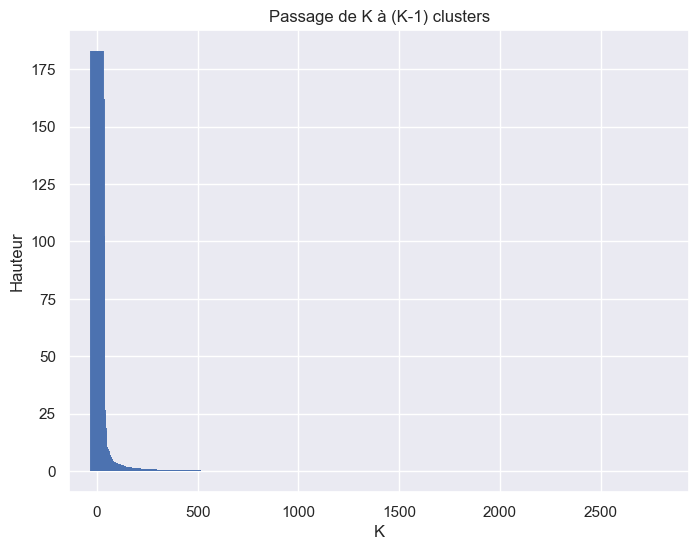

In [96]:
n = don.shape[0]
print(n)
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(range(2, n+1), 0, np.flip(np.sort(cah_out.distances_)), linewidth=10)
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

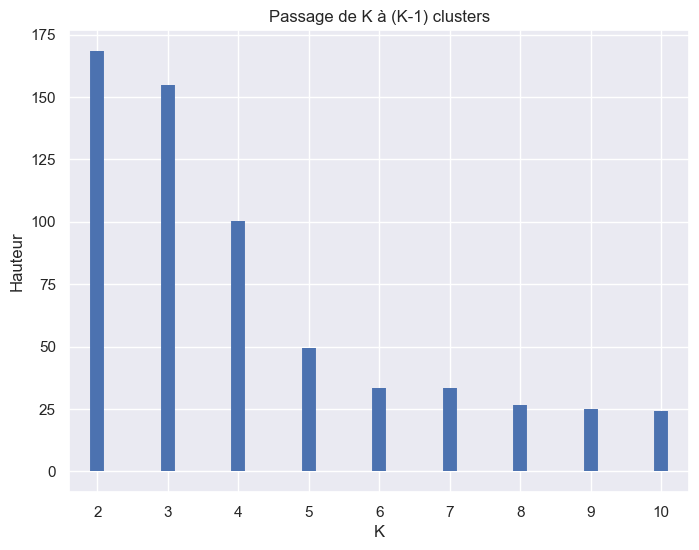

In [87]:
zoom = 10

sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(range(2, zoom+1), 0, np.flip(np.sort(cah_out.distances_))[0:zoom-1], linewidth=10)
ax.set_xticks(range(2, zoom+1))
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

Donc on coupe à 4 ou 5

In [99]:
k = 4

don_cluster = don

cah_model = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=k)
cah_out = cah_model.fit(don)

don_cluster['cluster_cah_ward'] = cah_out.fit_predict(don)
don_cluster['cluster_cah_ward'].value_counts()

2    1200
0     801
1     400
3     399
Name: cluster_cah_ward, dtype: int64

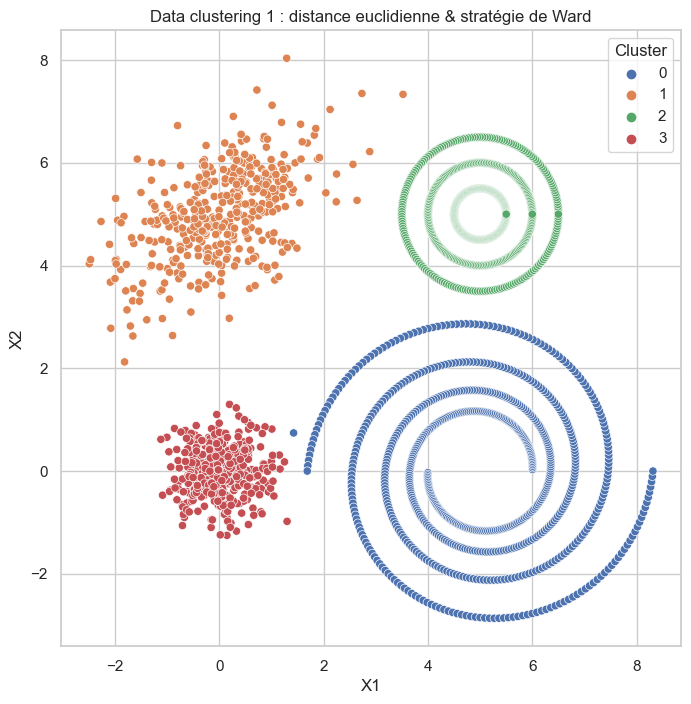

In [100]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=don_cluster, x='V1', y='V2', hue='cluster_cah_ward', palette='deep')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(title='Cluster')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

On va utiliser l'indice d'aggrégation single la distance entre 2 groupes est la plus petite distance entre individus des 2 groupes

In [103]:
cah_model = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(don)

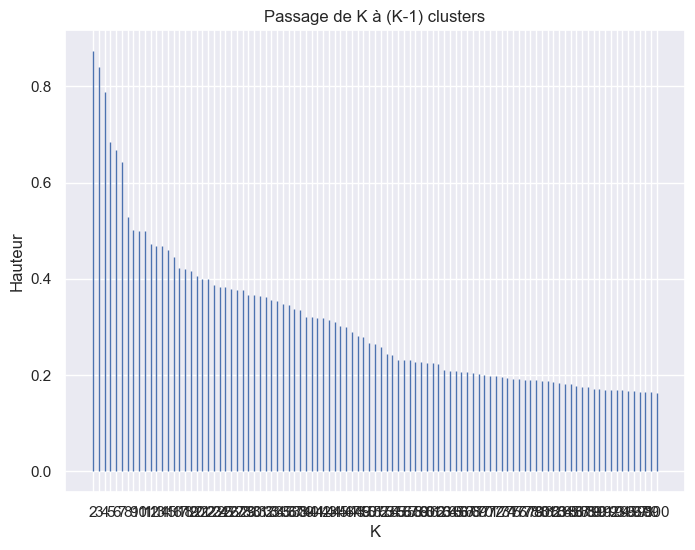

In [112]:
zoom = 100

sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(range(2, zoom+1), 0, np.flip(np.sort(cah_out.distances_))[0:zoom-1], linewidth=1)
ax.set_xticks(range(2, zoom+1))
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

In [117]:
k = 35

cah_model = AgglomerativeClustering(metric='euclidean', linkage='single', n_clusters=k)
cah_out = cah_model.fit(don)

don_cluster['cluster_cah_single'] = cah_out.fit_predict(don)
don_cluster['cluster_cah_single'].value_counts()

16    400
33    400
10    400
9     400
34    400
15    398
0     349
1      20
3       4
7       2
4       2
2       2
31      1
30      1
20      1
22      1
5       1
8       1
19      1
21      1
13      1
14      1
12      1
29      1
28      1
32      1
17      1
11      1
26      1
24      1
23      1
25      1
27      1
18      1
6       1
Name: cluster_cah_single, dtype: int64

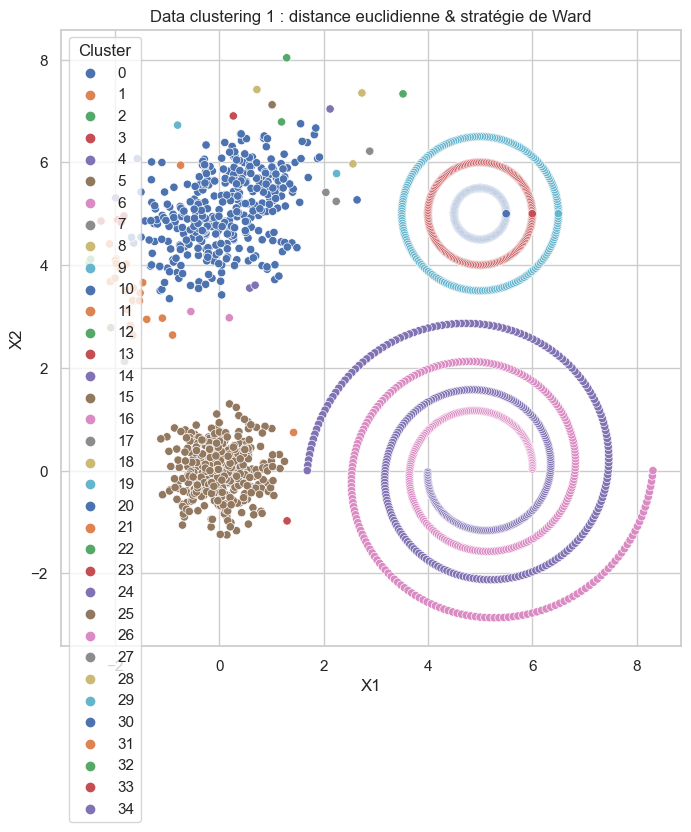

In [118]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=don_cluster, x='V1', y='V2', hue='cluster_cah_single', palette='deep')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(title='Cluster')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

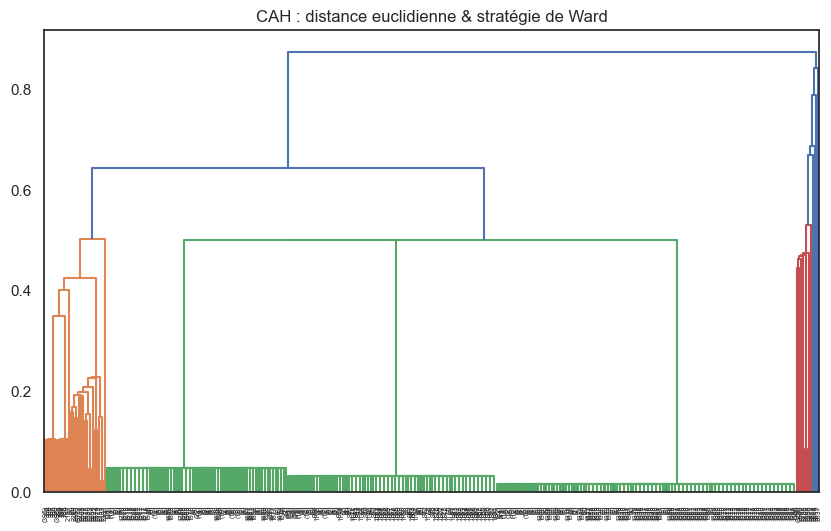

In [110]:
cah_model = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(don)
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('CAH : distance euclidienne & stratégie de Ward')
plot_dendrogram(cah_out, truncate_mode='level', p=10)
plt.show()

In [116]:
k = 35

cah_model = AgglomerativeClustering(metric='euclidean', linkage='single', n_clusters=k)
cah_out = cah_model.fit(don)

don_cluster['cluster_cah_single'] = cah_out.fit_predict(don)
don_cluster['cluster_cah_single'].value_counts()

16    400
33    400
10    400
9     400
34    400
15    398
0     349
1      20
3       4
7       2
4       2
2       2
31      1
30      1
20      1
22      1
5       1
8       1
19      1
21      1
13      1
14      1
12      1
29      1
28      1
32      1
17      1
11      1
26      1
24      1
23      1
25      1
27      1
18      1
6       1
Name: cluster_cah_single, dtype: int64

COMPLETE

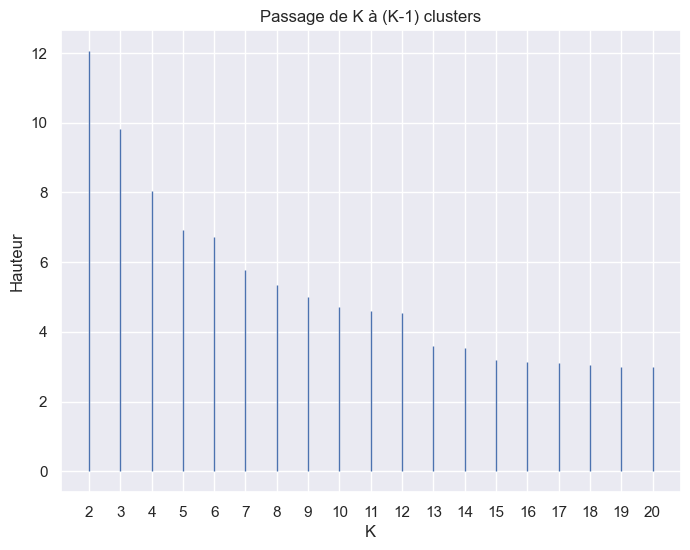

In [119]:
cah_model = AgglomerativeClustering(metric='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(don)
zoom = 20
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(range(2, zoom+1), 0, np.flip(np.sort(cah_out.distances_))[0:zoom-1], linewidth=1)
ax.set_xticks(range(2, zoom+1))
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

6 groupes ou 12

In [125]:
k = 4
cah_model = AgglomerativeClustering(metric='euclidean', linkage='complete', n_clusters=k)
cah_out = cah_model.fit(don)
don_cluster['cluster_cah_complete'] = cah_out.fit_predict(don)
don_cluster['cluster_cah_complete'].value_counts()

0    1328
1     816
3     408
2     248
Name: cluster_cah_complete, dtype: int64

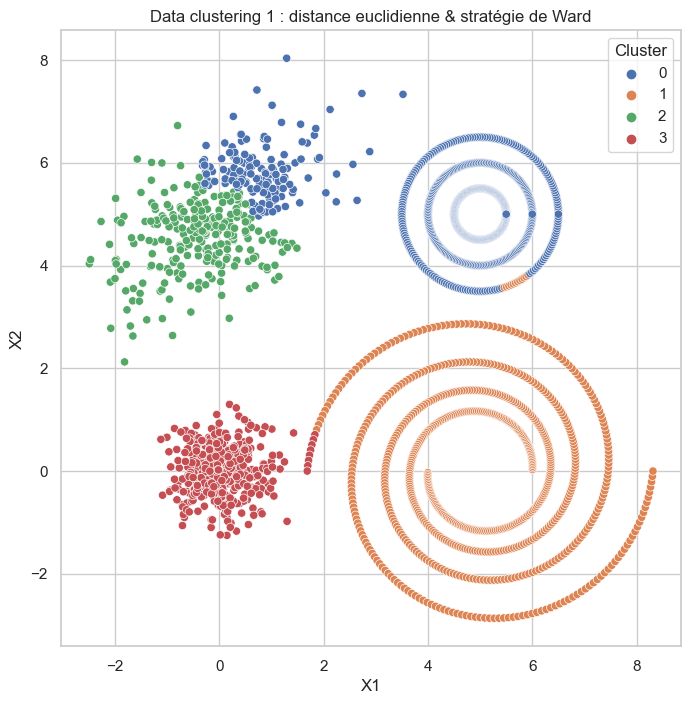

In [126]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=don_cluster, x='V1', y='V2', hue='cluster_cah_complete', palette='deep')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(title='Cluster')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

# dbscan

In [143]:
don = pd.read_table('donclassif.txt',header= 0,sep= ';',decimal   = '.')
don_cluster = don
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=.5,min_samples=5)
dbscan_out = dbscan_model.fit(don)

In [144]:
don_cluster['cluster_dbscan'] = dbscan_out.fit_predict(don)
don_cluster['cluster_dbscan'].value_counts()

 1    1200
 0    1199
 2     390
-1      11
Name: cluster_dbscan, dtype: int64

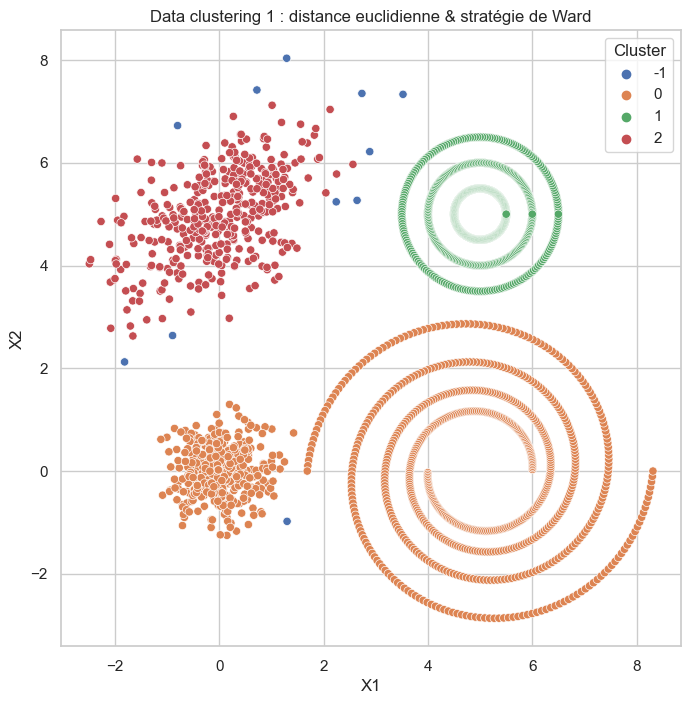

In [145]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=don_cluster, x='V1', y='V2', hue='cluster_dbscan', palette='deep')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(title='Cluster')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

Génial mais comment choisir le bon paramètre **eps**. En général on regarde la distance au nombre de points -1 fixé par min_samples ici 5

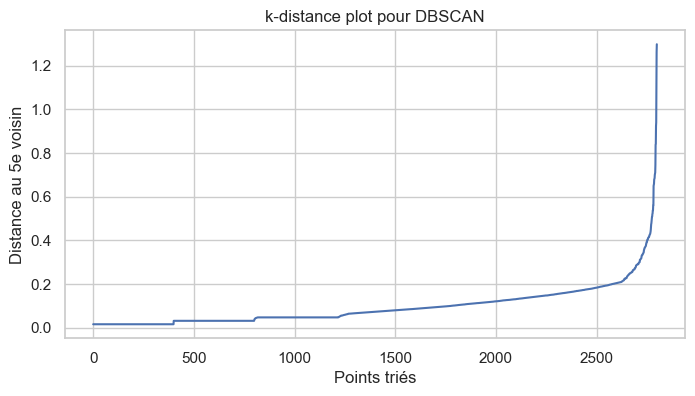

In [149]:
from sklearn.neighbors import NearestNeighbors
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(don)
distances, indices = neighbors_fit.kneighbors(don)

# distance au k-ième voisin
distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-distance plot pour DBSCAN")
plt.xlabel("Points triés")
plt.ylabel(f"Distance au {k}e voisin")
plt.show()

ici, la distance au 4 eme voisin est 0.2 donc eps=0.2

 2    400
 3    400
 4    400
 0    386
 1    386
 5    375
 7    281
-1    152
 6      8
 8      7
 9      5
Name: cluster_dbscan, dtype: int64


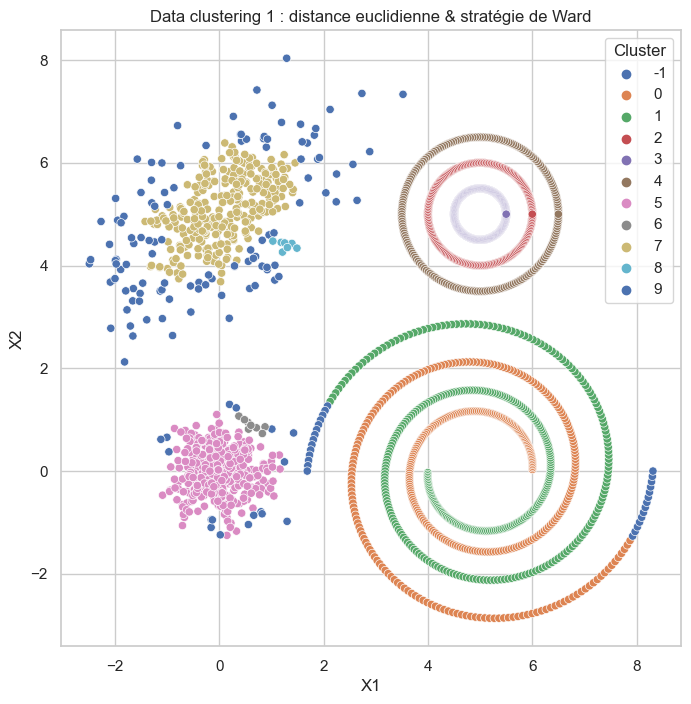

In [153]:
dbscan_model = DBSCAN(eps=.2,min_samples=5)
dbscan_out = dbscan_model.fit(don)
don_cluster['cluster_dbscan'] = dbscan_out.fit_predict(don)
print(don_cluster['cluster_dbscan'].value_counts())
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=don_cluster, x='V1', y='V2', hue='cluster_dbscan', palette='deep')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(title='Cluster')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

# Modèle de mélanges

In [163]:
from sklearn.mixture import GaussianMixture
don = pd.read_table('donclassif.txt',header= 0,sep= ';',decimal   = '.')
k_max = 20

AIC_BIC = pd.DataFrame(columns=['k', 'AIC', 'BIC'])

for k in range(1, k_max+1):
    em_model = GaussianMixture(n_components=k, covariance_type='full')
    em_out = em_model.fit(don)
    AIC_BIC.loc[k-1,'k'] = k
    AIC_BIC.loc[k-1,'AIC'] = em_out.aic(don)
    AIC_BIC.loc[k-1,'BIC'] = em_out.bic(don)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

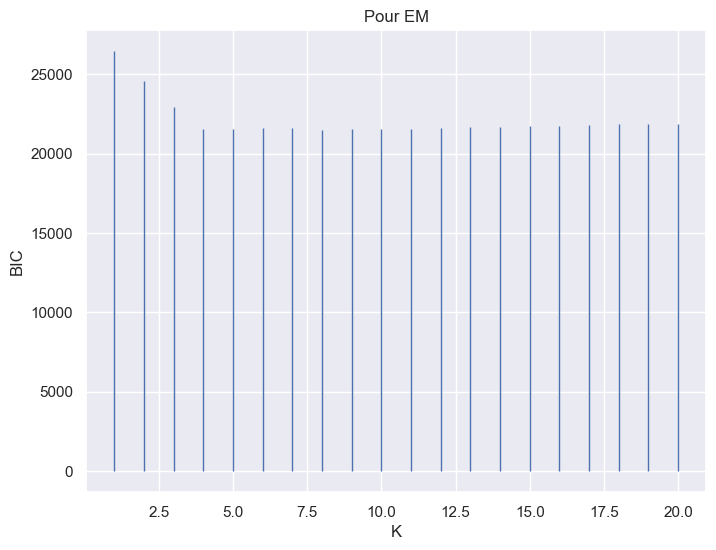

In [164]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(AIC_BIC['k'], 0, AIC_BIC['BIC'], linewidth=1)
ax.set_xlabel('K')
ax.set_ylabel('BIC')
plt.title('Pour EM')
plt.show()

In [165]:
k_max = 20
from sklearn.metrics import silhouette_score
silhouette = pd.DataFrame(columns=['k', 'silhouette'])

for k in range(2, k_max+1):
    em_model = GaussianMixture(n_components=k, covariance_type='full')
    em_out = em_model.fit(don)
    cluster_em = em_out.predict(don)
    silhouette.loc[k-1, 'k'] = k
    silhouette.loc[k-1, 'silhouette'] = silhouette_score(don, cluster_em)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

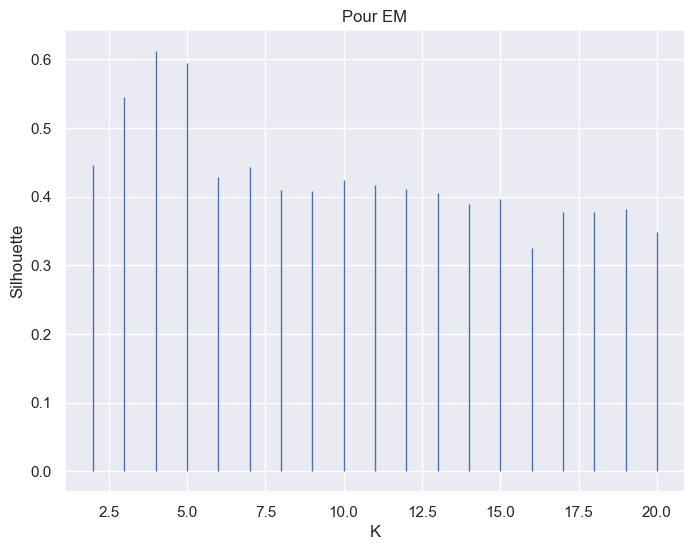

In [166]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(silhouette['k'], 0, silhouette['silhouette'], linewidth=1)
ax.set_xlabel('K')
ax.set_ylabel('Silhouette')
plt.title('Pour EM')
plt.show()

Pour faire tous les modèles de variance (full,diag.....)

In [181]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(don)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 10)},
             scoring=<function gmm_bic_score at 0x00000180E5EDD580>)

In [182]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
8,2,tied,5924.902647
0,2,spherical,6472.118938
2,4,spherical,6641.752494
26,4,full,6651.625101
18,4,diag,6775.022109


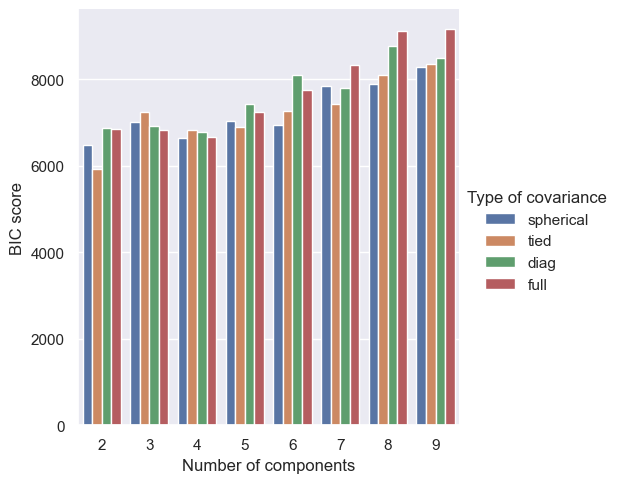

In [183]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [176]:
em_model = GaussianMixture(n_components=1, covariance_type='spherical')
em_out = em_model.fit(don)
cluster_em = em_out.predict(don)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [180]:
cluster_em

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)